In [10]:
from multiprocess import Pool
import numpy as np
import time

def do_all(input):
    from kniffel_forimport import run_game
    return run_game(printscoreboard=False)

if __name__ == '__main__':
    start_time = time.time()
    n = 1000
    scores = []
    iterations = [1 for _ in range(n)]
    p = Pool()
    scores = p.map(do_all, iterations)
    p.close()
    p.join()

    stop_time = time.time()
    total_time = stop_time - start_time
    hours = int(total_time // 3600)
    minutes = int((total_time % 3600) // 60)
    seconds = int(total_time % 60)
    print("Total time:", f"{hours:02d}:{minutes:02d}:{seconds:02d}")
    print("Average score:", np.mean(scores))
    print("Highest score:", np.max(scores))
    print("Lowest score:", np.min(scores))
    print("Samples:", len(scores))
    print("Samples per second:", np.round(len(scores) / total_time, 2))

Total time: 00:02:45
Average score: 250.315
Highest score: 449
Lowest score: 144
Samples: 1000
Samples per second: 6.05


In [ ]:
import matplotlib.pyplot as plt

plt.hist(scores, bins=389, density=True) # 63, 84, 126, 251
plt.xlabel('Sum')
plt.ylabel('Normalized Frequency')
plt.title('1000 Samples (one kniffel, avg 248.8)')
plt.show()

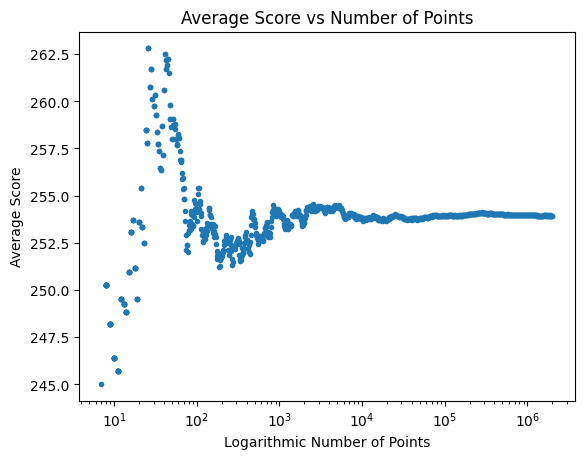

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import random


# Load the file content
file_path = r"C:\Users\paulk\Documents\Programmieren\Python\Kniffel\saves\2000000samples_07022024\scores.txt"
with open(file_path, 'r') as file:
    file_content = file.read()

# Convert the file content to a numpy array and filter it
filtered_numbers = np.fromstring(file_content, sep='\n')
random.shuffle(filtered_numbers)


# Calculate the logarithmic number of points
numbers = np.floor(np.logspace(0.9, np.log10(len(filtered_numbers)), num=1000, base=10))

# Calculate the average score
avg_list = []
for number in numbers:
    avg_list.append(np.median(filtered_numbers[:int(number)]))
    

# Plot the average score over the logarithmic number of points
plt.plot(numbers, avg_list, '.')
plt.xlabel('Logarithmic Number of Points')
plt.ylabel('Average Score')
plt.title('Average Score vs Number of Points')
plt.xscale('log')
plt.show()


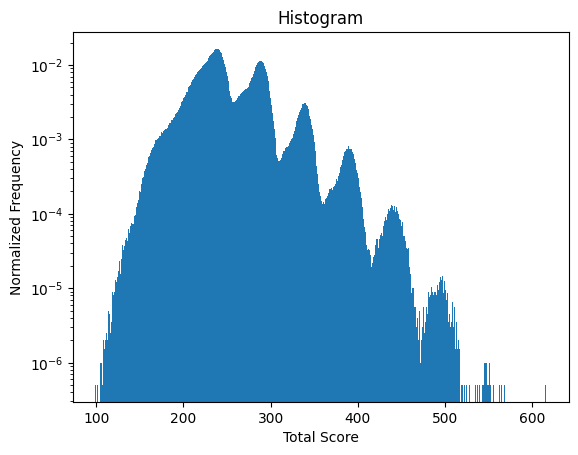

In [3]:
import numpy as np
import matplotlib.pyplot as plt
file_path = r"C:\Users\paulk\Documents\Programmieren\Python\Kniffel\saves\2000000samples_07022024\scores.txt"
file_content = np.loadtxt(file_path)

plt.hist(file_content, bins=518, density=True) # 63, 84, 126, 251
plt.title('Histogram')
plt.xlabel('Total Score')
plt.ylabel('Normalized Frequency')
plt.yscale('log')
plt.show()

